## knn
        :k개의 최근접 이웃 알고리즘
   - 가장 가까운 이웃의 정답을 확인하고 test를 예측하는 것
   - 거리를 계산 : 유클리디안 거리공식 (다차원의 거리를 계산할 수 있다)
   - knn 이웃의 수를 조정하는 매개변수 : n_neighbors
   - 이웃의 수 값이 작으면 과대적합일 확류이 높음
   - 적당한 이웃의 수를 찾아야 함 --> 일반화
   - 이웃의 수 값이 너무나도 크면 과소적합일 확률이 높다
#### 과소적합
     - train 학습이 제대로 되지 않아서 test성능도 떨어지는 상태(예측못하는상태)
#### 과대적합
     - train 학습을 너무 맞춰서 하다보니 규칙이 복잡해져 test에대한 성능은 떨어지는 상태(test예측 못하는 상태)
#### 일반화
     - train에 대한 학습도 적당히 잘 되고, test대한 성능도 어느정도 잘 나오는 상태 => 어떤 데이터가 들어오더라도 성능이 일반적으로 잘 나온다

### 목표
 - 붓꽃 꽃잎의 길이/너비, 꽃받침의 길이/너비 특징을 활용해서 3가지 품종을 분류하는 모델을 만들어보자
 - knn 모델의 이웃의 숫자를 조절해보자(k개수를 조절, 하이퍼 파라미터 튜닝)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.metrics import accuracy_score # 정확도 측정
# train, test 분리하는 도구
from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris # 붓꽃 데이터 불러오기

In [3]:
iris_data = load_iris()
iris_data

# 딕셔너리처럼 활용 가능
# sklearn.datasets -> 자료형태: bunch객체
# 딕셔너리 데이터 접근 : 인덱싱 가능 x, 키값을 불러서 밸류에 접근
# 키값들만 확인
iris_data.keys()
# data : (필수) 문제 데이터, X, 독립변수, 설명변수, 피처(feature), 특성
# target : (필수) 답 데이터, y, 종속변수, 결과, 실제적 답, target
# feature_names : (옵션) 문제 데이터 이름 리스트(컬럼명 list)
# target_names : (옵션) 답 데이터 이름 리스트
# DESCR : (옵션) 자료에 대한 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 문제 데이터 접근
# 크기확인
# 위에서 5개 행만 출력(행 잘라내기) --> 확인용
sh = iris_data['data'].shape # 150행, 4열 (2차원)
print(f'행:{sh[0]}, 열:{sh[1]}')
iris_data['data'][0:5] # dtype float

행:150, 열:4


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# 특성(문제 데이터) 이름 확인
iris_data.feature_names

# ['sepal length (cm)', 꽃받침의 길이
#  'sepal width (cm)', 꽃받침의 너비
#  'petal length (cm)', 꽃잎의 길이
#  'petal width (cm)'] 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# 답데이터 확인
# iris_data.target
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# 답 데이터 이름 확인하기
iris_data.target_names

# ['setosa' - 0, 'versicolor' - 1, 'virginica' - 2]

# 타겟 이름으로 답데이터 확인하기
iris_data.target_names[iris_data['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [9]:
# 설명 확인
# DESCR
print(iris_data.DESCR) # \n 때문에 프린트로 뽑아줌

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 정리
 - 문제 데이터를 DF 형태로 변환(2차원)
 - 문제 데이터와 답데이터로 변수 정리(X,y)
 - train, test 분리 ( train_test_split )
     - X_train, X_test, y_train, y_test 

In [10]:
iris_df = pd.DataFrame(iris_data.data,
                       columns = iris_data.feature_names)
# 위에서부터 5개 출력
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# 문제와 답
X = iris_df
y = iris_data.target # target 데이터 연결하기
print(X.shape, y.shape)

(150, 4) (150,)


In [12]:
X_train,X_test,y_train,y_test = ['훈련문제','테스트문제',
                                 '훈련답','테스트답']
print(X_train, y_train)
print(X_test, y_test) # unpacking 

# split_data = ['훈련문제','테스트문제','훈련답','테스트답']
# X_train = split_data[0]
# X_test = split_data[1]
# y_train = split_data[2]
# y_test = split_data[3]

훈련문제 훈련답
테스트문제 테스트답


In [22]:
# train_test_split : 1. 랜덤으로 섞어줌 2. 훈련, 테스트 분리
# 통상적으로 7:3 분리 -> train 크기 : 0.7, test 크기 : 0.3(30%)
# 비율적인 의미로 넣어주려면 실수형태
# 개수 의미로 넣어주려면 정수형태
# 7.5:2.5, 8:2
# shuffle 섞는 기능 True
# train_test_split(문제, 답, 테스트사이즈)
# random_state shuffle을 동일한 기준으로 실행

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [14]:
X_test.shape

(45, 4)

In [23]:
# 크기확인
print('훈련용 셋:', X_train.shape, y_train.shape)
print('테스트용 셋:', X_test.shape, y_test.shape)
# 문제 개수만큼 답 개수가 셋팅
# 훈련용 특성의 개수만큼 테스트용 특성 개수가 셋팅

훈련용 셋: (112, 4) (112,)
테스트용 셋: (38, 4) (38,)


In [24]:
# 분리된 데이터 클래스별 개수 확인하기
# 7:3 비율 데이터 분리, 모델 입장에서 학습을 잘 하려면 다양한 데이터가 필요함
pd.Series(y_train).value_counts()
np.unique(y_train, return_counts = True)[1]/112
# array([0.34285714, 0.3047619 , 0.35238095]) 7:3
# array([0.33035714, 0.30357143, 0.36607143]) 7.5:2.5
# 비율을 바꿔 봤을 때 다양성이 유지되는 쪽으로 설정값을 사용

array([0.33035714, 0.30357143, 0.36607143])

### 데이터 탐색
   - 특성간의 관계 확인
   - 품종을 분리하기 위해서 어떤 특성이 도움이 될까?

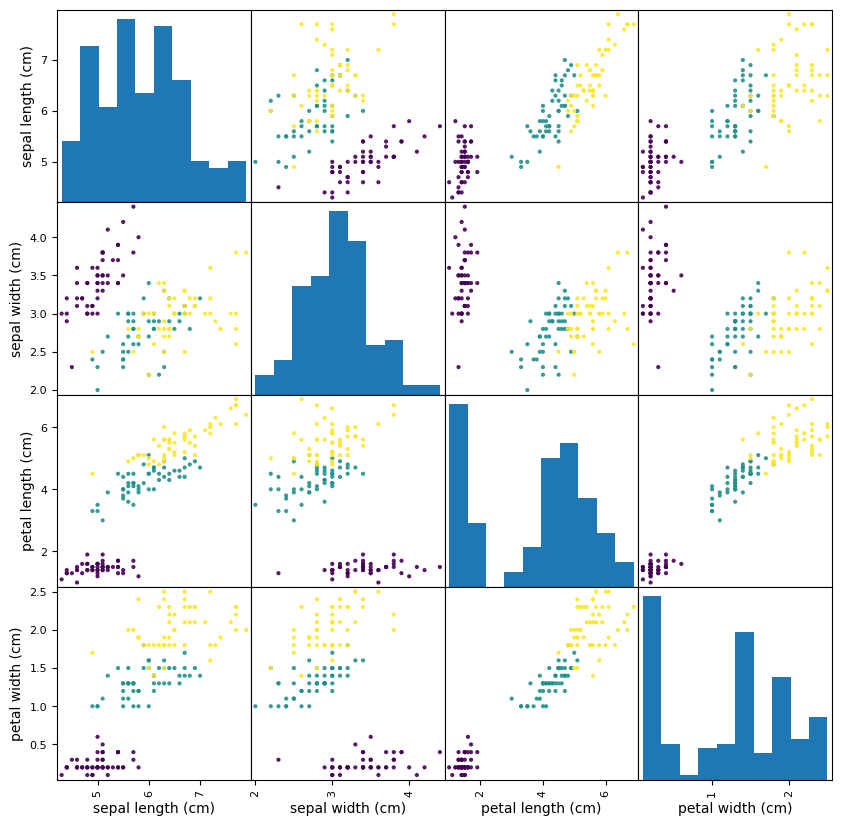

In [28]:
# 산점도 행렬(scatterplot matrix) : 한꺼번에 특성간 관계를 일목요연하게 확인
pd.plotting.scatter_matrix(iris_df,
                          figsize = (10,10),
                          c = y,
                          alpha = 0.9)
plt.show()
# 꽃잎의 길이, 너비 컬럼이 품종을 분류하는데 많은 영향을 주고 있음

### 모델링
   - 모델 객체 생성 및 하이퍼 파라미터 조정
   - 모델 학습
   - 모델 평가 및 예측

In [29]:
# 객체 생성 이웃의 개수 5로 설정(default -)
# 모델명 iris_knn = 
iris_knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
# 모델 학습
# 모델.fit(트레인 문제, 트레인 답)
iris_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# 모델 예측
# pre 변수에 담아보기
# 모델.predict(테스트문제)
pre = iris_knn.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [34]:
# 숫자로 나온 예값을 문자(품종의 이름)로 출력해보기
iris_data.target_names[pre]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [35]:
# 평가
accuracy_score(y_test, pre)
# 7:3 -> 97%
# 7.5:2.5 -> 100%
# 7.5:2.5 분리한 데이터를 학습 knn 모델을 바로 믿을 수 있는건가?
# 평가 딱 1번 진행
# 새롭게 예측한 데이터는 1번 -> 여러번 검증(교차검증)

1.0

- 하이퍼 파라미터 조정(튜닝)
    - n_neighbors : 이웃 수를 여러번 바꿔보면서 모델의 성능을 확인해보자

In [39]:
# 저장하는 빈 리스트 2개 설정
train_list = [] # train 성능
test_list = [] # test 성능

#1에서 50까지 2칸씩 뛰면서 k값을 셋팅
n_setting = range(1,50,2) # 이웃의 수

for k in n_setting:
    # 모델 생성
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습 train 데이터 활용
    knn_clf.fit(X_train, y_train)
    
    # 모델 예측 및 평가(성능 확인)
    # train -> train_list 저장
    train_pre = knn_clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pre)
    train_list.append(train_acc)
    
    # test -> test_list 저장
    test_pre = knn_clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pre)
    test_list.append(test_acc)    

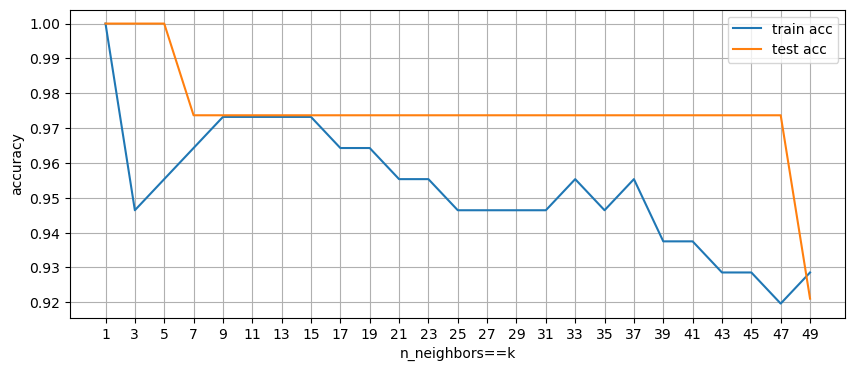

In [48]:
# k값이 바뀜에 따른 성능 추이 확인
# 선 그래프
# 하이퍼 파라미터 튜닝 결과 시각화
plt.figure(figsize = (10,4))
plt.plot(n_setting, train_list, label ='train acc')
plt.plot(n_setting, test_list, label= 'test acc')
plt.legend() # 범례출력
plt.grid() # 그래프 눈금선 출력
plt.ylabel('accuracy') # y축 이름 설정
plt.xlabel('n_neighbors==k') # x축 이름 설정
plt.xticks(n_setting) # x 축 격자 크기 설정
plt. show()

#  train 100% 맞춘다라는건 과대적합일확률이 높을 수 있음
# knn 값이 커질수록 성능이 떨어지고 있음
# -> 점점 과소적합일 확률이 높아지고 있음
# 학습용 데이터라서 모델이 학습하기에 예측하기에 쉬운 데이터
# 데이터에 대해서 여러번 검증해서 확인해봐야함 (교차검증)
# -> 신뢰 가능한 모델인지 판단